In [1]:
library(tidyverse)
library(leaps)
library(tidymodels)
library(ggplot2)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [16]:
#Sleep_Efficiency.csv
data = read.csv("https://raw.githubusercontent.com/Yuji03b/STAT-306-group-project/main/Sleep_Efficiency.csv",header=T)


data$Exercise.frequency = as.integer(data$Exercise.frequency)

# remove bedtime and wake up time
dat <- data[, -c(4, 5)]

# remove NA
dat <- na.omit(dat)
grahp_1 <- dat[,-c(1)]

# convert to factor
dat$Gender = as.factor(dat$Gender)
dat$Smoking.status=as.factor(dat$Smoking.status)

# remove ID
dat2 <- dat[, -c(1,8)]
head(dat2)

,Age,Gender,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Deep.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status,Exercise.frequency
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<int>
1,65,Female,6,0.88,18,70,0,0,0,Yes,3
2,69,Male,7,0.66,19,28,3,0,3,Yes,3
3,40,Female,8,0.89,20,70,1,0,0,No,3
4,40,Female,6,0.51,23,25,3,50,5,Yes,1
5,57,Male,8,0.76,27,55,3,0,3,No,3
7,27,Female,6,0.54,28,25,2,50,0,Yes,1


In [7]:
# forward selection on all features
s <- regsubsets(Sleep.efficiency ~ ., data=dat2, method="forward",nvmax=10)
ss <- summary(s)


forward_summary_df <- tibble(
    n_input_variables = 1:10,
    ADJ.R2 = ss$adjr2,
    Cp = ss$cp,
    BIC = ss$bic
)
forward_summary_df

n_input_variables,ADJ.R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>
1,0.6216810,345.751259,-366.2247
2,0.7286273,140.103176,-490.1810
3,0.7624349,75.872469,-536.8530
4,0.7855301,32.482334,-571.5856
5,0.7919887,21.081537,-578.5028
6,0.7956678,15.037225,-580.4828
7,0.7989668,9.751538,-581.8570
8,0.8007956,7.283339,-580.4641
9,0.8003959,9.042816,-574.7505


In [11]:

inference_model <- lm(Sleep.efficiency~Age+REM.sleep.percentage+Deep.sleep.percentage+Awakenings+Caffeine.consumption+ Alcohol.consumption+ Smoking.status + Exercise.frequency, data=dat2)
summary(inference_model)
tidy(inference_model)


Call:
lm(formula = Sleep.efficiency ~ Age + REM.sleep.percentage + 
    Deep.sleep.percentage + Awakenings + Caffeine.consumption + 
    Alcohol.consumption + Smoking.status + Exercise.frequency, 
    data = dat2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17106 -0.04091  0.00488  0.03992  0.14676 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.3634105  0.0298044  12.193  < 2e-16 ***
Age                    0.0009562  0.0002349   4.071 5.70e-05 ***
REM.sleep.percentage   0.0066438  0.0009314   7.133 5.02e-12 ***
Deep.sleep.percentage  0.0055625  0.0002365  23.518  < 2e-16 ***
Awakenings            -0.0318493  0.0024973 -12.753  < 2e-16 ***
Caffeine.consumption   0.0002333  0.0001101   2.119  0.03477 *  
Alcohol.consumption   -0.0062024  0.0021082  -2.942  0.00346 ** 
Smoking.statusYes     -0.0457656  0.0066573  -6.875 2.57e-11 ***
Exercise.frequency     0.0064591  0.0022283   2.899  0.00396 ** 
---
Signif. code

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.3634104710,0.0298043725,12.193193,4.450181e-29
Age,0.0009561706,0.0002348634,4.071177,5.696450e-05
REM.sleep.percentage,0.0066437927,0.0009314321,7.132879,5.021654e-12
Deep.sleep.percentage,0.0055625145,0.0002365262,23.517537,4.635769e-76
Awakenings,-0.0318493010,0.0024973038,-12.753475,3.042330e-31
Caffeine.consumption,0.0002333085,0.0001101231,2.118615,3.477310e-02
Alcohol.consumption,-0.0062024223,0.0021081747,-2.942082,3.460505e-03
Smoking.statusYes,-0.0457656360,0.0066572544,-6.874551,2.571124e-11
Exercise.frequency,0.0064591314,0.0022282587,2.898735,3.964649e-03


In [18]:

model_with_9var <- lm( Sleep.efficiency~Age+REM.sleep.percentage+Deep.sleep.percentage+Awakenings+Caffeine.consumption+ Alcohol.consumption+ Smoking.status + Exercise.frequency+Sleep.duration ,data=dat2)
summary(model_with_9var)



Call:
lm(formula = Sleep.efficiency ~ Age + REM.sleep.percentage + 
    Deep.sleep.percentage + Awakenings + Caffeine.consumption + 
    Alcohol.consumption + Smoking.status + Exercise.frequency + 
    Sleep.duration, data = dat2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.170377 -0.040176  0.006542  0.039975  0.145540 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.3494082  0.0412696   8.466 5.66e-16 ***
Age                    0.0009634  0.0002356   4.090 5.28e-05 ***
REM.sleep.percentage   0.0066537  0.0009326   7.135 4.98e-12 ***
Deep.sleep.percentage  0.0055691  0.0002371  23.484  < 2e-16 ***
Awakenings            -0.0318116  0.0025010 -12.720  < 2e-16 ***
Caffeine.consumption   0.0002362  0.0001104   2.139  0.03304 *  
Alcohol.consumption   -0.0061382  0.0021143  -2.903  0.00391 ** 
Smoking.statusYes     -0.0457536  0.0066640  -6.866 2.72e-11 ***
Exercise.frequency     0.0065030  0.0022323   2.913  0

In [19]:
AIC(inference_model)
AIC(model_with_9var)

[1] -1063.893

[1] -1062.14

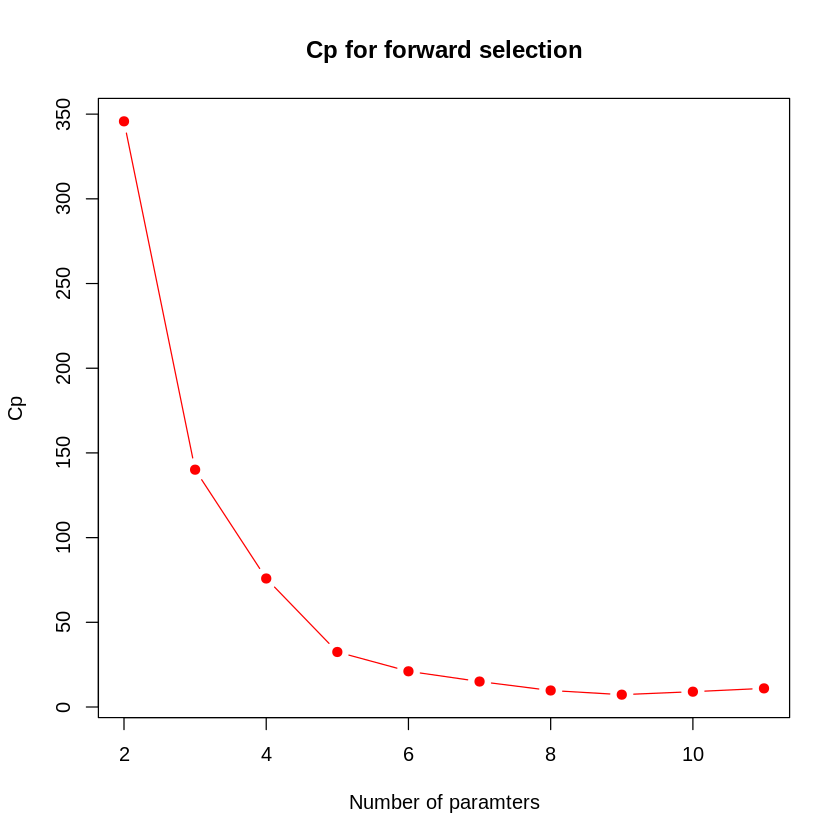

In [20]:
plot(x=2:11,y=ss$cp,
  main = "Cp for forward selection",
  xlab = "Number of paramters", ylab = "Cp", type = "b", pch = 19,
  col = "red"
)

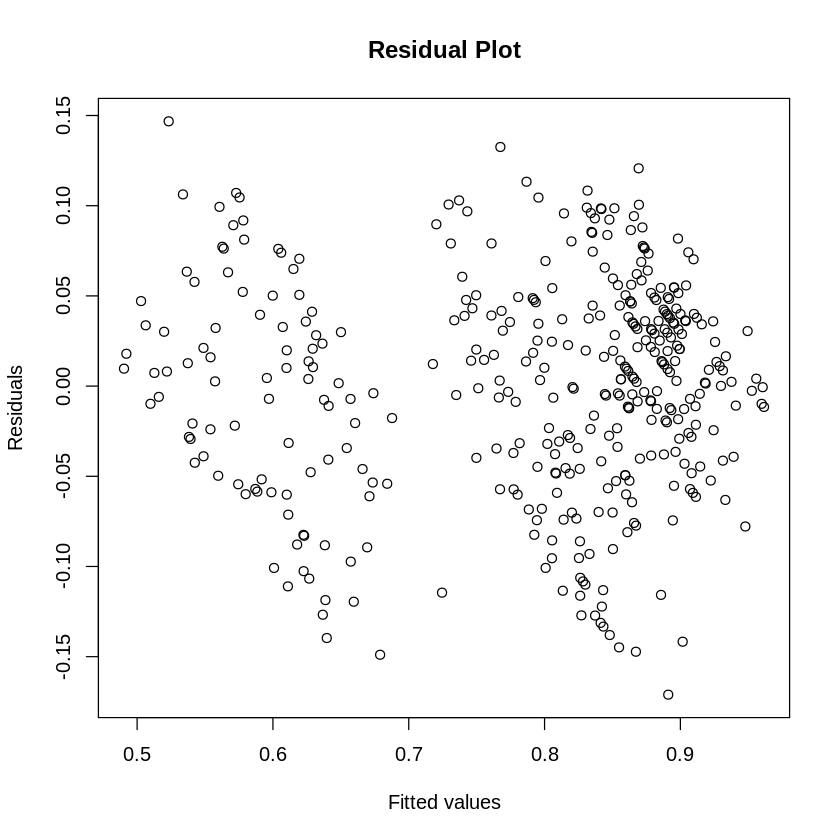

In [21]:
residuals <- residuals(inference_model)

# Create a residual plot
plot(predict(inference_model), residuals,
     xlab = "Fitted values",
     ylab = "Residuals",
     main = "Residual Plot")


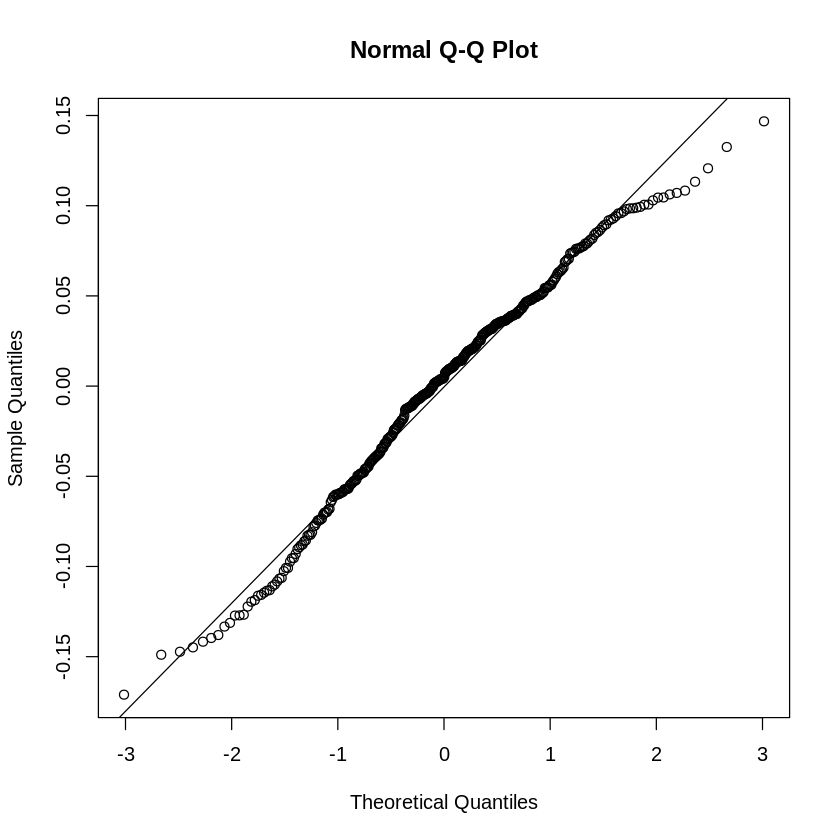

In [101]:
# create QQ normal plot
qqnorm(residuals)
qqline(residuals)
